Data Science Dojo <br/>
Copyright(c) 2016-2020<br/>

---

**Objective:** Building a decision tree classification model to predict the species of Iris flowers<br/>

<b>Note</b>: The below libraries are already installed on the learning portal to run this exercise.<br/>
If you would like to run this code on your local machine using R studio or Jupyter Notebook, please run the below install commands in your command line or R studio. <br/>
If you would like to run this code on your local Jupyter Notebook, you can also run the below install commands in a new cell of jupyter notebook instead of command line.<br/>

Please install "rpart" package: `install.packages("rpart")`<br/>

In [1]:
# Load the library for this exercise
# NOTE: Please ignore the warning messages
library(rpart)

### The Iris dataset
Before building a model for predicting the species of Iris flowers, we first need to read and explore the Iris dataset.

#### Dataset description
**Iris:** This iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica. __[Click here to read more](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/iris)__.

In [2]:
# Load the iris dataset into memory     
data(iris) 

In [3]:
# View the dimension of the dataset   
dim(iris)

[1] 150   5

In [4]:
# View the first few rows of the dataset   
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [5]:
# View the struture of the dataset   
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [6]:
# View the summary statistics of the dataset
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

### Building the model

Build and train a model to classify the different Iris species.

In [7]:
# Randomly sample 70% of the rows in the dataset to use as our training set rows
train.index <- sample(1:nrow(iris), 0.7*nrow(iris)) 

In [8]:
# Assign these randomly selected 70% of rows to our training subset of data
iris.train <- iris[train.index,  ] 
dim(iris.train)

[1] 105   5

In [9]:
# Use the remaining 30% as the testing set
iris.test <- iris[-train.index,  ]
dim(iris.test)

[1] 45  5

In [10]:
# Default decision tree model
# Builds a decision tree from the iris dataset to predict species given all other columns as predictors
iris.tree <- rpart(Species ~., data = iris.train)  

### Visualizing the model

Let's look how the decision tree model looks visually for the Iris dataset.

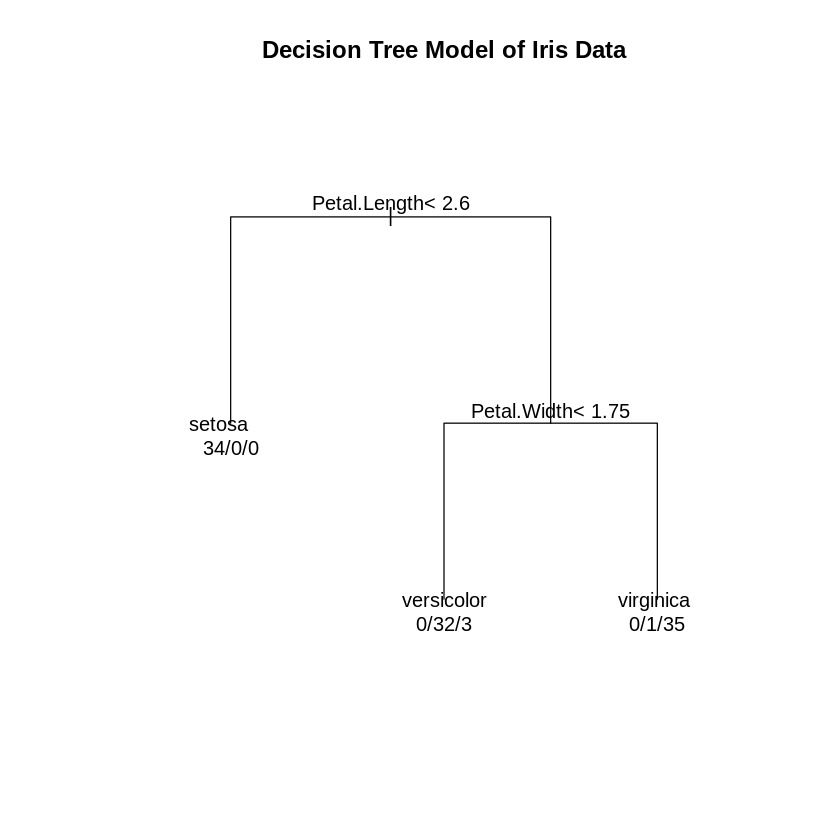

In [11]:
# Visualize the model
# Plot the tree structure
plot(iris.tree, margin = c(0.25))
title(main = "Decision Tree Model of Iris Data")
text(iris.tree, use.n = TRUE)

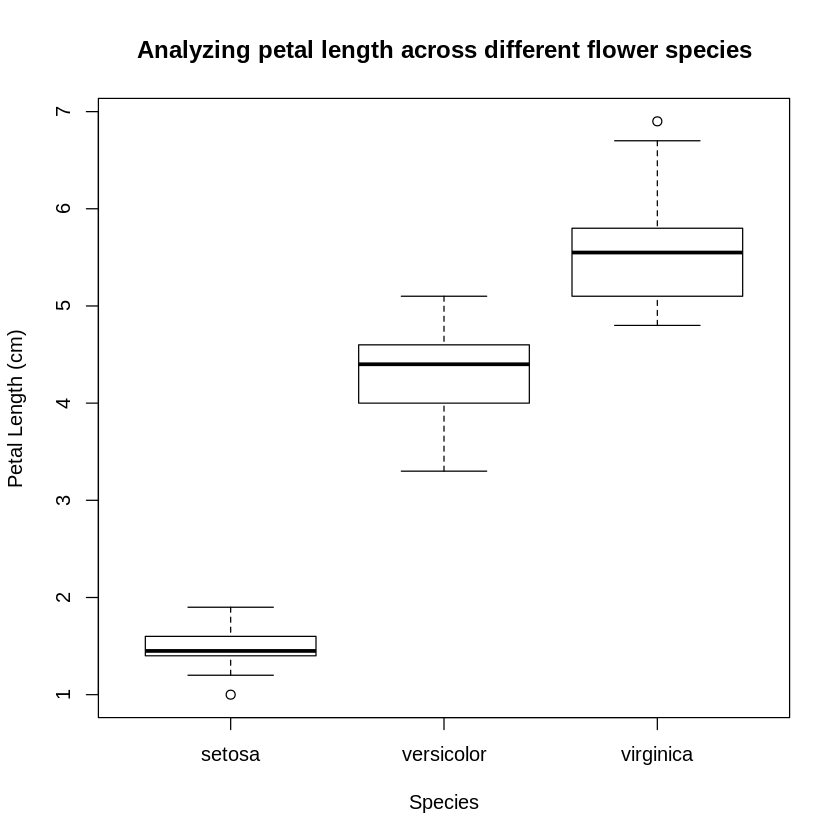

In [12]:
# Let's see how the Petal.Length looks across different species    
boxplot(Petal.Length ~ Species, data = iris.train, main="Analyzing petal length across different flower species",
        xlab="Species",
        ylab="Petal Length (cm)")

In [13]:
# Print the iris.tree model
iris.tree

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 67 virginica (0.32380952 0.31428571 0.36190476)  
  2) Petal.Length< 2.6 34  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 71 33 virginica (0.00000000 0.46478873 0.53521127)  
    6) Petal.Width< 1.75 35  3 versicolor (0.00000000 0.91428571 0.08571429) *
    7) Petal.Width>=1.75 36  1 virginica (0.00000000 0.02777778 0.97222222) *

### Model predictions

We will use the test data to make predict the iris species using the model we built.

In [14]:
# Predict iris species given test data using the decision model
iris.predictions <- predict(iris.tree, iris.test, type = "class")
head(iris.predictions)

1      2      4      8      9     14 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

In [15]:
# Predicted values can also be probabilities,instead of class labels
iris.predictions.prob <- predict(iris.tree, iris.test, type = "prob")
head(iris.predictions.prob)

,setosa,versicolor,virginica
1,1,0,0
2,1,0,0
4,1,0,0
8,1,0,0
9,1,0,0
14,1,0,0


In [16]:
# Comparison table of actual values and predicted values
iris.comparison <- iris.test
iris.comparison$Predictions <- iris.predictions
iris.comparison[ , c("Species", "Predictions")]

,Species,Predictions
1,setosa,setosa
2,setosa,setosa
4,setosa,setosa
8,setosa,setosa
9,setosa,setosa
14,setosa,setosa
16,setosa,setosa
20,setosa,setosa
21,setosa,setosa
27,setosa,setosa


In [17]:
# View misclassified rows
disagreement.index <- iris.comparison$Species != iris.comparison$Predictions 
iris.comparison[disagreement.index, ]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Predictions
107,4.9,2.5,4.5,1.7,virginica,versicolor
134,6.3,2.8,5.1,1.5,virginica,versicolor


### Regression decision tree

Using decision tree, we can also build a regression model where the outcome is a predicted number instead of a predicted class.

In [18]:
# Use method "anova" as a parameter to set a regression decision tree model
iris.tree <- rpart(Petal.Length ~ ., data = iris.train, method="anova")

### Further practice

Another library called "party" can be also used to build decision trees. It provides nonparametric regression trees for nominal, ordinal, numeric, censored, and multivariate responses. Tree growth is based on statistical stopping rules, so pruning should not be required. 

See `party` manual: http://cran.r-project.org/web/packages/party/party.pdf 

Instead of `rpart()`, try to use `ctree()` in `party` for the same data. They implement a different algorithm for building the tree. But for this small amount of data, do these different functions (with different algorithms) actually give us different trees?

### Reproducible results with set.seed() 

The sample() function used above randomly selects 105 rows from the 150 in the dataset. So, the train.index stores 105 numbers corresponding to the 105 rows. However, the row numbers stored in train.index is not always fixed. If we run `train.index <- sample(1:nrow(iris), 0.7*nrow(iris))` again, the numbers in train.index will be changed. As a result, the training data will be changed.  

+ Try running this code repeatedly and see how the output changes everytme.

  + `sample(1:10, 5)`  

Often, we want our code to reproduce the exact same set of random numbers. We can use the `set.seed()` function to do this.  The `set.seed()` function takes an integer argument. Once the `set.seed()` has been used, the output of all the subsequent random operations, such as `sample()` get fixed, which ensures reproducability of the results.   

+ Try running sample(1:10, 5) again but after setting the seed as 100  
    + `set.seed(100)`
    + `sample(1:10, 5)` 
    
    
+ Now try running sample(1:10, 5) again after changing the seed to 999   
    + `set.seed(999)`
    + `sample(1:10, 5)`  
    
+ Change the seed back to 100 to see how you get the same results   
    + `set.seed(100)`
    + `sample(1:10, 5)`  